In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("/home/shaurya/Downloads/shopping_behavior_updated.csv")

In [9]:
print(data.shape[0])

3900


In [10]:
data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [11]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [15]:
print(data.apply(lambda col: col.unique())) 

Customer ID               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Age                       [55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 3...
Gender                                                       [Male, Female]
Item Purchased            [Blouse, Sweater, Jeans, Sandals, Sneakers, Sh...
Category                       [Clothing, Footwear, Outerwear, Accessories]
Purchase Amount (USD)     [53, 64, 73, 90, 49, 20, 85, 34, 97, 31, 68, 7...
Location                  [Kentucky, Maine, Massachusetts, Rhode Island,...
Size                                                          [L, S, M, XL]
Color                     [Gray, Maroon, Turquoise, White, Charcoal, Sil...
Season                                       [Winter, Spring, Summer, Fall]
Review Rating             [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, ...
Subscription Status                                               [Yes, No]
Shipping Type             [Express, Free Shipping, Next Day Air, Standar...
Discount App

In [18]:
data.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [19]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [21]:
num_locations = data["Location"].value_counts()
print("number of locations", num_locations)

number of locations Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Utah              71
Wyoming           71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizo

In [22]:
num_category = data.groupby("Location")["Category"].value_counts()
print("Category wise trends:\n", num_category)

Category wise trends:
 Location   Category   
Alabama    Clothing       41
           Accessories    25
           Footwear       15
           Outerwear       8
Alaska     Clothing       33
                          ..
Wisconsin  Outerwear       3
Wyoming    Clothing       31
           Accessories    23
           Footwear       11
           Outerwear       6
Name: count, Length: 200, dtype: int64


In [23]:
location_purchase_stats = data.groupby("Location")["Purchase Amount (USD)"].agg(["mean", "median", "sum"])
print("Regional Purchase Amount Stats:\n", location_purchase_stats)

Regional Purchase Amount Stats:
                      mean  median   sum
Location                               
Alabama         59.112360    56.0  5261
Alaska          67.597222    68.5  4867
Arizona         66.553846    68.0  4326
Arkansas        61.113924    58.0  4828
California      59.000000    57.0  5605
Colorado        56.293333    51.0  4222
Connecticut     54.179487    48.5  4226
Delaware        55.325581    52.5  4758
Florida         55.852941    56.0  3798
Georgia         58.797468    62.0  4645
Hawaii          57.723077    55.0  3752
Idaho           60.075269    62.0  5587
Illinois        61.054348    65.0  5617
Indiana         58.924051    60.0  4655
Iowa            60.884058    60.0  4201
Kansas          54.555556    50.0  3437
Kentucky        55.721519    53.0  4402
Louisiana       57.714286    55.5  4848
Maine           56.987013    57.0  4388
Maryland        55.755814    52.0  4795
Massachusetts   60.888889    64.0  4384
Michigan        62.095890    63.0  4533
Minneso

In [24]:
shipping_type_counts = data.groupby("Location")["Shipping Type"].value_counts()
print("Regional Shipping Type Trends:\n", shipping_type_counts)

Regional Shipping Type Trends:
 Location  Shipping Type 
Alabama   Express           20
          Store Pickup      19
          Next Day Air      17
          2-Day Shipping    16
          Free Shipping      9
                            ..
Wyoming   Express           13
          Next Day Air      12
          Standard          11
          Free Shipping     10
          2-Day Shipping     8
Name: count, Length: 300, dtype: int64


In [25]:
location_groups = data.groupby("Location")

# Analyze regional trends
for location, location_data in location_groups:
    print(f"Regional Trends for {location}:")

    # Calculate average purchase amount in this region
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f"Average Purchase Amount: ${avg_purchase_amount:.2f}")

    # Count the most popular product categories in this region
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Most Popular Category: {popular_categories}")

    # Analyze online shopping preferences
    online_shopping = location_data["Shipping Type"].apply(lambda x: "Online" if "Express" in x or "Standard" in x else "Offline")
    online_percentage = (online_shopping.value_counts() / len(online_shopping)) * 100
    print(f"Online Shopping Preference:")
    print(online_percentage)

    # Consider other factors based on your data and business context

    print("\n")

Regional Trends for Alabama:
Average Purchase Amount: $59.11
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    68.539326
Online     31.460674
Name: count, dtype: float64


Regional Trends for Alaska:
Average Purchase Amount: $67.60
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    58.333333
Online     41.666667
Name: count, dtype: float64


Regional Trends for Arizona:
Average Purchase Amount: $66.55
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    66.153846
Online     33.846154
Name: count, dtype: float64


Regional Trends for Arkansas:
Average Purchase Amount: $61.11
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    65.822785
Online     34.177215
Name: count, dtype: float64


Regional Trends for California:
Average Purchase Amount: $59.00
Most Popular Category: Clothing
Online Shopping Preference:
Shipping Type
Offline    66.315789
Online     33

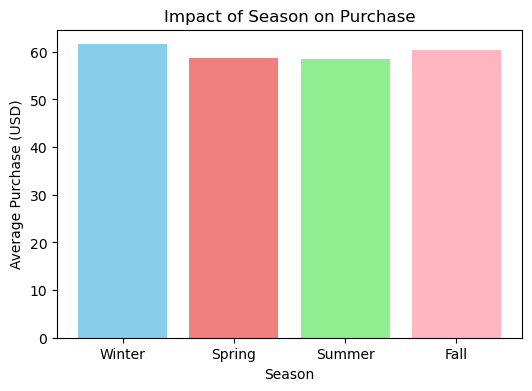

In [26]:
seasons = data['Season'].unique()
average_purchase_by_season = data.groupby('Season')['Purchase Amount (USD)'].mean()

plt.figure(figsize=(6, 4))
plt.bar(seasons, average_purchase_by_season, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title("Impact of Season on Purchase")
plt.xlabel("Season")
plt.ylabel("Average Purchase (USD)")
plt.show()

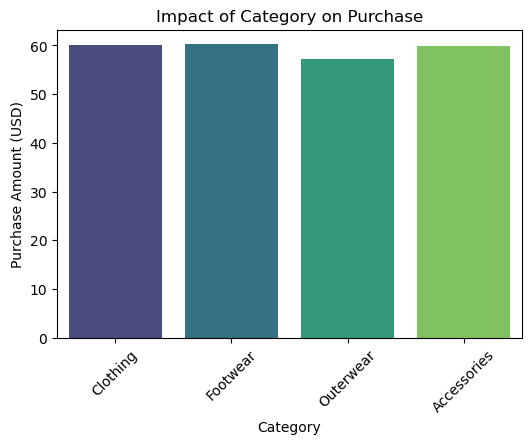

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, ci=None, palette='viridis')
plt.title("Impact of Category on Purchase")
plt.xticks(rotation=45)
plt.show()

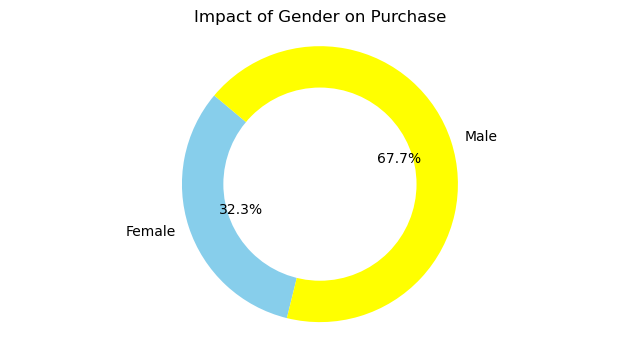

In [28]:
gender_purchase = df.groupby('Gender')['Purchase Amount (USD)'].sum()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(gender_purchase, labels=gender_purchase.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellow'], wedgeprops=dict(width=0.4))
ax.set_title("Impact of Gender on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that the chart is drawn as a circle.

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

plt.show()


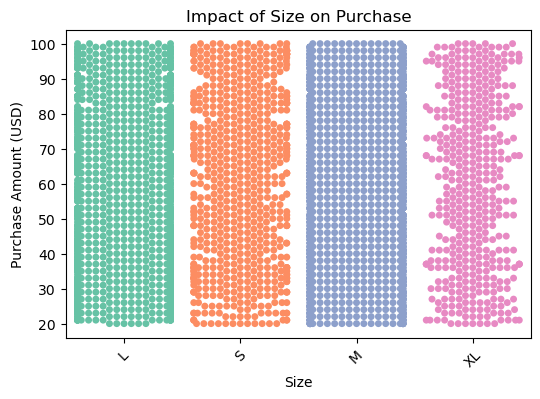

In [29]:
plt.figure(figsize=(6, 4))
sns.swarmplot(x='Size', y='Purchase Amount (USD)', data=df, palette='Set2')
plt.title("Impact of Size on Purchase")
plt.xlabel('Size')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

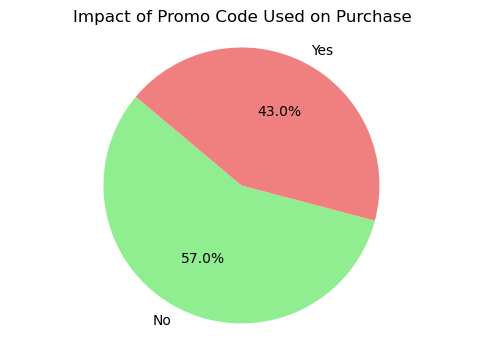

In [30]:
promo_counts = df['Promo Code Used'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title("Impact of Promo Code Used on Purchase")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

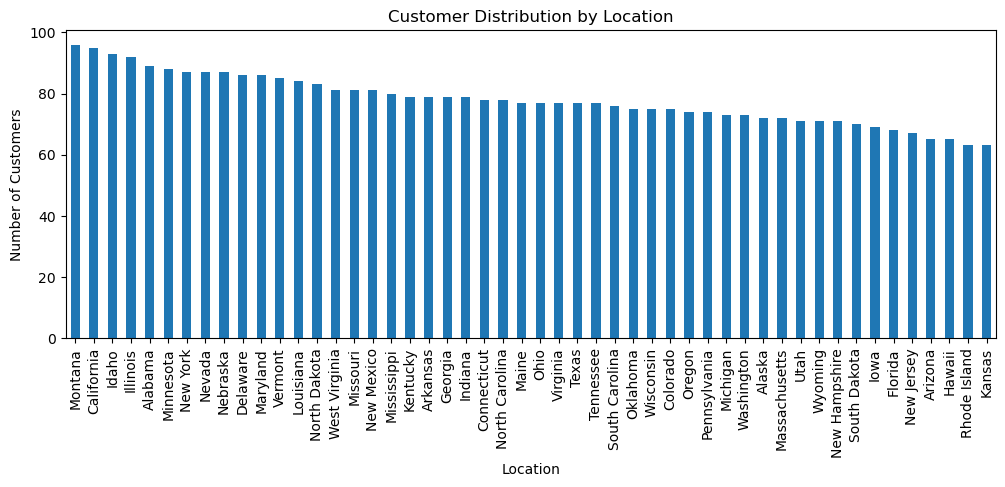

In [32]:
num_locations.plot(kind="bar", figsize=(12, 4))
plt.title("Customer Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.show()

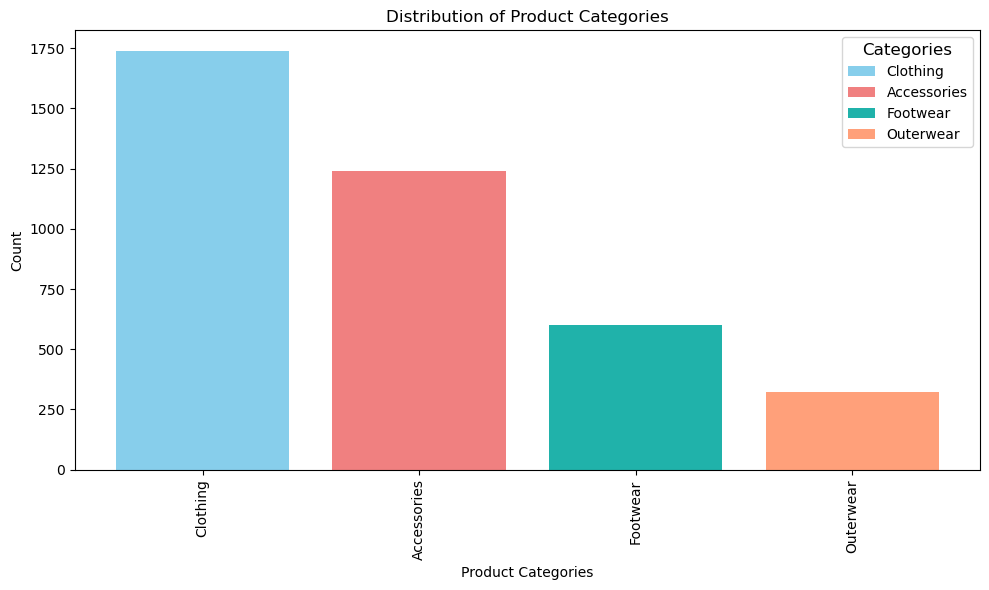

In [35]:
num_category = df['Category'].value_counts()

# Define a list of different colors for each bar
colors = ['skyblue', 'lightcoral', 'lightseagreen', 'lightsalmon', 'lightpink']

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the bar chart with different colors for each bar
bars = plt.bar(num_category.index, num_category.values, color=colors)

# Add labels and title
plt.xlabel('Product Categories')
plt.ylabel('Count')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=90)

# Display the chart
plt.tight_layout()

# Optionally, you can add a legend to show the correspondence between colors and categories
legend_labels = num_category.index[:len(colors)]  # Take labels for the number of colors used
legend = plt.legend(bars[:len(colors)], legend_labels, title='Categories', loc='upper right')
plt.setp(legend.get_title(), fontsize=12)

plt.show()

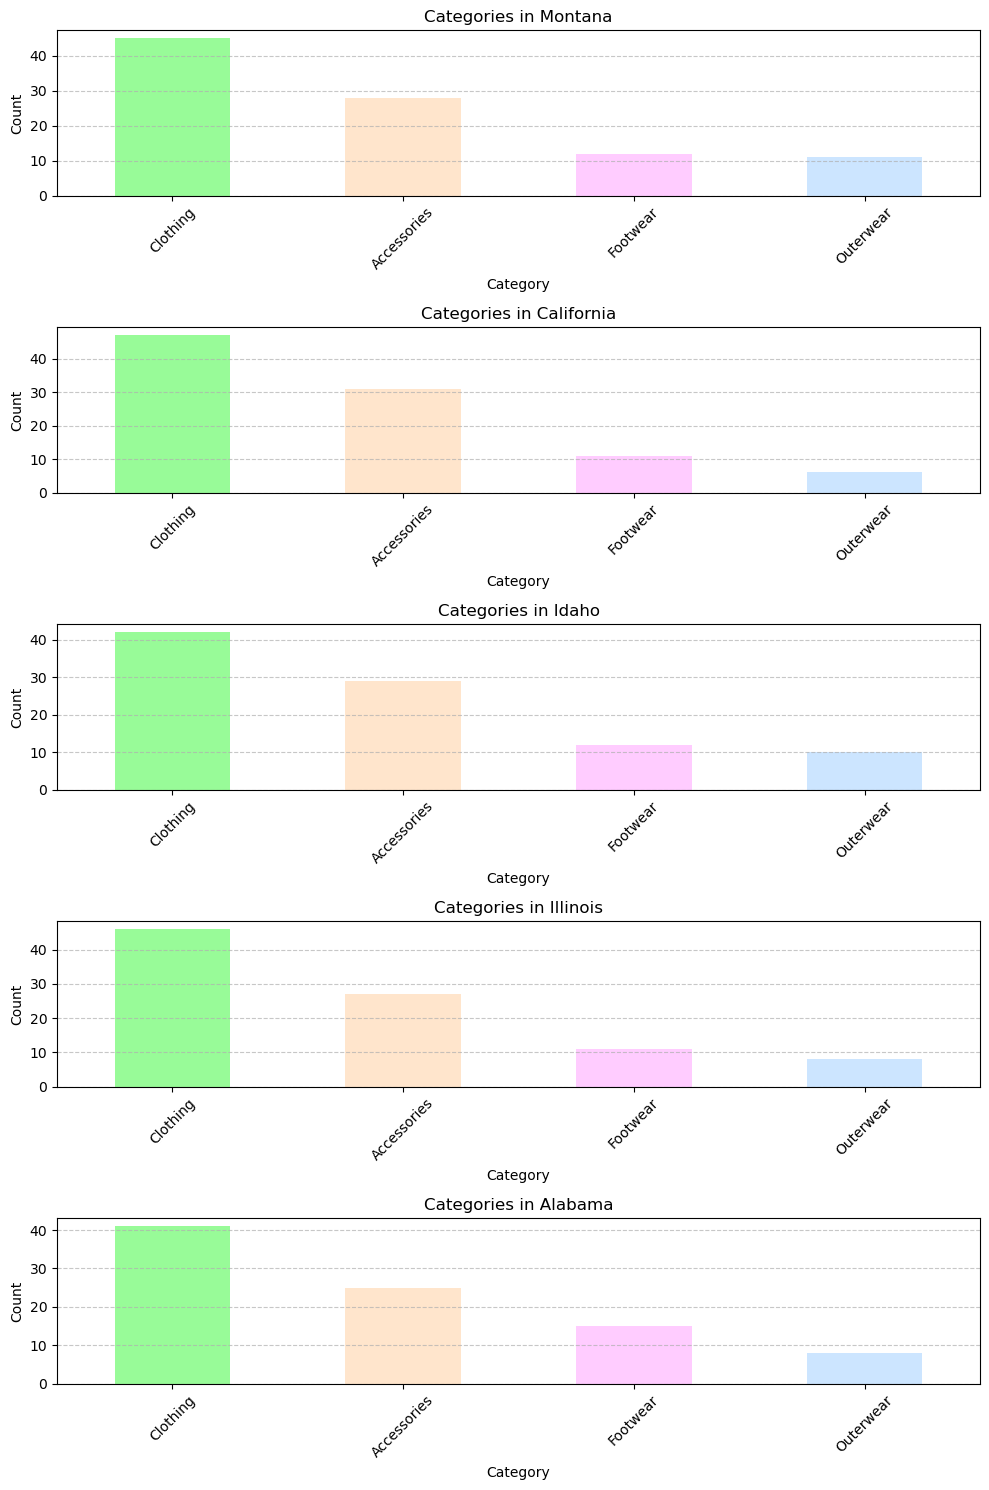

In [36]:
top_locations = df['Location'].value_counts().head(5).index

# Define different colors for bars
colors = ['#98FB98', '#FFE5CC', '#FFCCFF', '#CCE5FF', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a subplot grid for each location
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Iterate through the top locations and create category distribution plots with different colors
for i, location in enumerate(top_locations):
    location_data = df[df['Location'] == location]
    
    # Count the most common product categories in this location
    category_counts = location_data['Category'].value_counts().head(10)
    
    # Create a bar plot for the category distribution with different colors
    ax = axes[i]
    category_counts.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Categories in {location}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Count")
    ax.set_xticklabels(category_counts.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust subplot layout for a clean appearance
plt.tight_layout()

# Display the visualizations
plt.show()

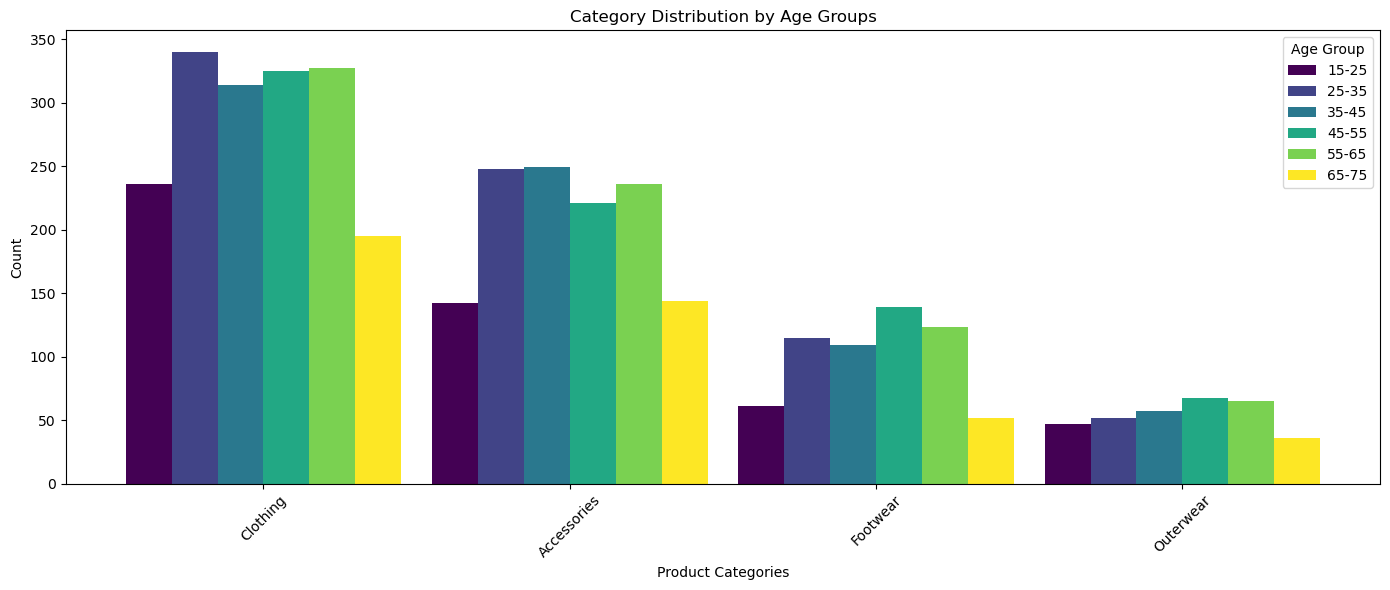

In [37]:
age_groups = [15, 25, 35, 45, 55, 65]

# Create subplots for each age group
fig, ax = plt.subplots(figsize=(14, 6))

# Create a colormap for age groups
colors = plt.cm.viridis(np.linspace(0, 1, len(age_groups)))

# Initialize a dictionary to store category counts for each age group
category_counts_by_age = {age: [] for age in age_groups}

# Calculate category counts for each age group
for age in age_groups:
    age_group_data = df[(df['Age'] >= age) & (df['Age'] < age + 10)]
    category_counts = age_group_data['Category'].value_counts()
    category_counts_by_age[age] = category_counts

# Create the bar chart
width = 0.15
x = np.arange(len(category_counts_by_age[age_groups[0]].index))

for i, age in enumerate(age_groups):
    category_counts = category_counts_by_age[age]
    ax.bar(x + i * width, category_counts, width=width, label=f'{age}-{age+10}', color=colors[i])

ax.set_xlabel('Product Categories')
ax.set_ylabel('Count')
ax.set_title('Category Distribution by Age Groups')
ax.set_xticks(x + width * (len(age_groups) - 1) / 2)
ax.set_xticklabels(category_counts_by_age[age_groups[0]].index, rotation=45)
ax.legend(title='Age Group')

plt.tight_layout()
plt.show()